In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import h5py    
hf = h5py.File('SVHN_single_grey1.h5')
hf.keys()
x_test=np.array(hf['X_test'])
x_train=np.array(hf['X_train'])
y_test=np.array(hf['y_test'])
y_train=np.array(hf['y_train'])

In [3]:
x_train.shape

(42000, 32, 32)

In [4]:
x_test.shape

(18000, 32, 32)

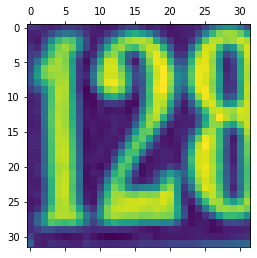

In [5]:
plt.matshow(x_train[0])

In [6]:
y_train[0]

2

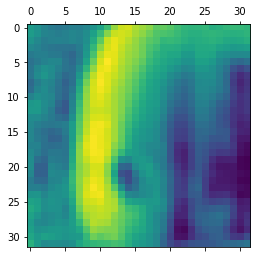

In [7]:
plt.matshow(x_train[10])

In [8]:
y_train[10]

1

In [9]:

x_train=x_train/255
x_test=x_test/255

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [11]:
model=Sequential()

In [16]:
model.add(Flatten(input_shape=[32,32]))
model.add(Dense(200,activation='sigmoid'))
model.add(Dense(200,activation='sigmoid'))
model.add(Dense(200,activation='tanh'))
model.add(Dense(200,activation='tanh'))

model.add(Dense(10,activation='softmax'))# there are 10 classes

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 200)               205000    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 200)               2

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics='accuracy')

In [19]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.2936 - accuracy: 0.5990
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.8985 - accuracy: 0.7330
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.8554 - accuracy: 0.7414
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.8214 - accuracy: 0.7512
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7989 - accuracy: 0.7582
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7855 - accuracy: 0.7616
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7631 - accuracy: 0.7664
Epoch 8/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7529 - accuracy: 0.7698
Epoch 9/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7376 - accuracy: 0.7752
Epoch 10/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.710

In [20]:
y_predict=model.predict(x_test)

## Confusion matrix

In [21]:
Y_pred_labels=[np.argmax(i) for i in y_predict]
print(Y_pred_labels)

[0, 7, 2, 9, 0, 9, 1, 6, 1, 4, 8, 2, 9, 4, 5, 5, 8, 6, 8, 5, 0, 6, 5, 0, 5, 2, 0, 1, 9, 5, 2, 8, 9, 1, 0, 9, 9, 3, 3, 7, 0, 4, 2, 4, 9, 4, 0, 6, 8, 3, 5, 3, 7, 1, 6, 8, 4, 1, 0, 0, 0, 1, 8, 9, 6, 2, 2, 7, 0, 8, 9, 8, 1, 8, 4, 5, 9, 8, 6, 0, 5, 4, 2, 8, 2, 0, 0, 9, 0, 6, 6, 2, 0, 5, 0, 7, 6, 9, 8, 7, 0, 7, 3, 7, 1, 4, 9, 6, 1, 0, 1, 0, 9, 0, 2, 4, 4, 1, 0, 9, 0, 3, 9, 0, 5, 0, 3, 0, 4, 1, 6, 6, 0, 9, 4, 9, 6, 8, 0, 0, 0, 2, 9, 5, 5, 0, 0, 0, 9, 6, 5, 0, 8, 9, 4, 8, 6, 4, 0, 7, 0, 0, 7, 4, 9, 2, 7, 0, 7, 1, 5, 2, 8, 0, 4, 5, 0, 5, 5, 5, 7, 2, 9, 6, 1, 0, 0, 3, 6, 0, 6, 8, 4, 9, 5, 2, 7, 8, 6, 5, 5, 5, 2, 3, 0, 2, 1, 8, 2, 8, 9, 5, 2, 0, 2, 3, 0, 2, 0, 0, 5, 1, 1, 7, 8, 9, 0, 0, 1, 3, 4, 8, 6, 3, 0, 7, 6, 7, 7, 4, 8, 7, 2, 3, 0, 0, 6, 4, 1, 3, 3, 8, 0, 4, 5, 7, 0, 0, 8, 2, 4, 6, 1, 9, 7, 7, 9, 0, 6, 2, 0, 0, 5, 0, 0, 7, 7, 0, 8, 9, 6, 3, 7, 7, 6, 6, 3, 2, 5, 2, 9, 4, 3, 0, 9, 1, 4, 5, 5, 5, 9, 7, 7, 3, 6, 1, 0, 1, 1, 4, 8, 6, 0, 3, 3, 2, 6, 0, 0, 1, 0, 6, 5, 1, 0, 1, 0, 7, 7, 0, 6, 3, 8, 

In [22]:

from sklearn.metrics import confusion_matrix

In [23]:
mat=confusion_matrix(y_test,Y_pred_labels)
mat

array([[1711,   15,    4,    5,   11,    5,   26,   16,    9,   12],
       [ 168, 1486,    8,   21,   32,   11,   19,   55,   14,   14],
       [ 155,   47, 1273,   40,   25,   14,   16,  165,   27,   41],
       [ 126,   81,   27, 1061,   20,  222,   25,   79,   40,   38],
       [ 200,   73,   14,   12, 1314,   14,  126,   15,   24,   20],
       [ 172,   35,    5,   37,   17, 1255,  131,   28,   45,   43],
       [ 335,   26,    7,    5,   48,   37, 1313,   16,   41,    4],
       [ 126,   71,   23,    9,    6,    6,   15, 1540,    7,    5],
       [ 299,   40,   11,   20,    9,   55,  192,   12, 1120,   54],
       [ 473,   44,   15,   39,   14,   84,   23,   39,   75,  998]],
      dtype=int64)

<AxesSubplot:>

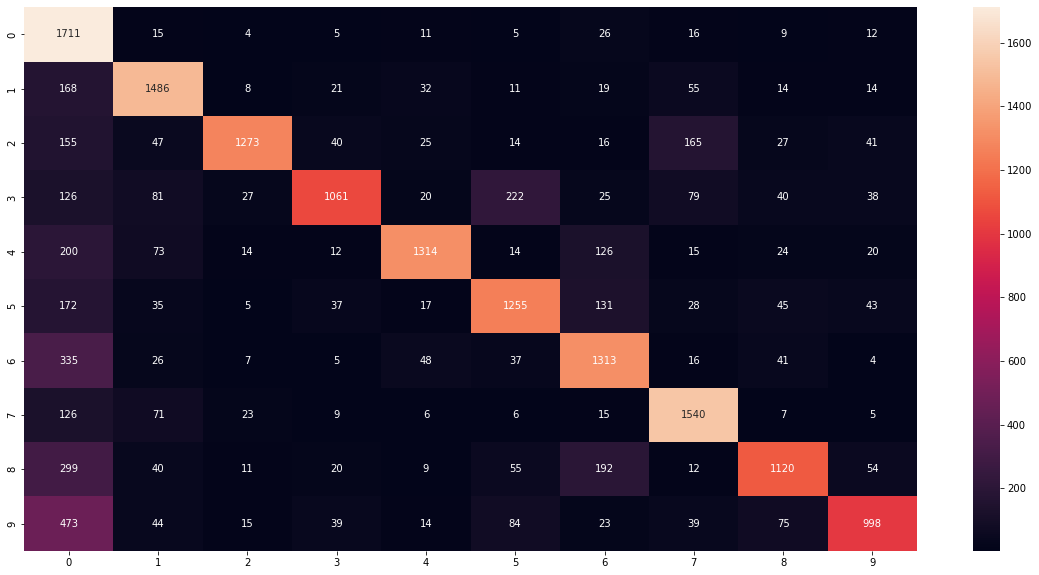

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(mat,annot=True, fmt ='d')

<AxesSubplot:>

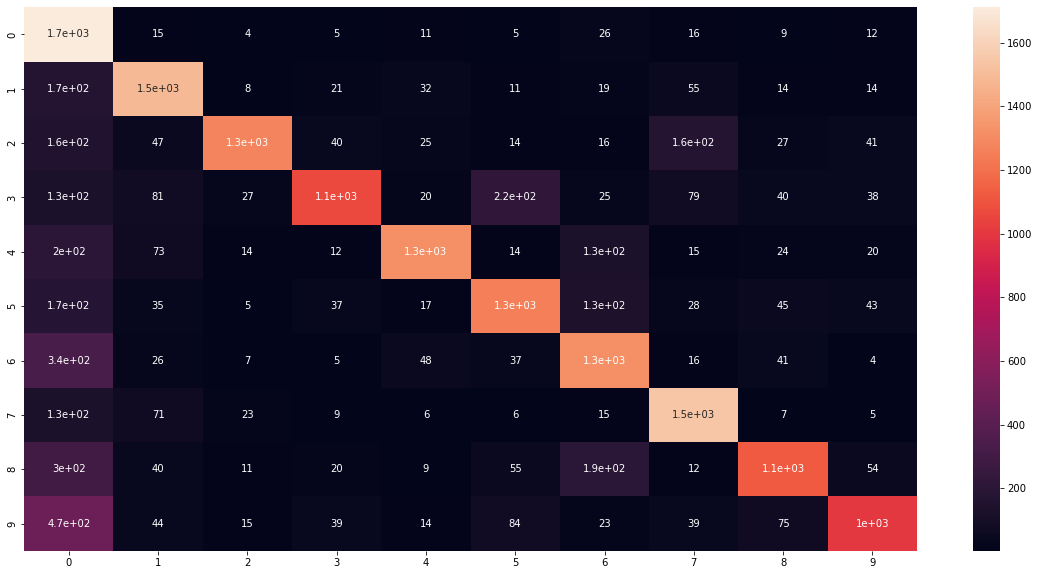

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(mat,annot=True)

In [29]:
model.evaluate(x_test,y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.9221 - accuracy: 0.7262


[0.9221461415290833, 0.7261666655540466]

In [30]:
model.evaluate(x_train,y_train)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.8316 - accuracy: 0.7457


[0.8316251039505005, 0.7457380890846252]